In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv("data.csv")
print(data)

    0.78051  -0.063669  1
0   0.28774    0.29139  1
1   0.40714    0.17878  1
2   0.29230    0.42170  1
3   0.50922    0.35256  1
4   0.27785    0.10802  1
..      ...        ... ..
94  0.77029    0.70140  0
95  0.73156    0.71782  0
96  0.44556    0.57991  0
97  0.85275    0.85987  0
98  0.51912    0.62359  0

[99 rows x 3 columns]


In [96]:
data.columns = ["x1", "x2", "label"]
x = data[['x1','x2']].values
y = data['label'].values
errors = []

In [97]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [98]:
def classification(w, x, b):
    z = w[0]*x[0] + w[1]*x[1] + b
    return sigmoid(z)

In [99]:
def run_perceptron(w, x, y, r, b):
    for i in range(len(x)):
        y_hat = classification(w, x[i], b)
        error = y[i] - y_hat
        b += r * error
        w += r * error * x[i]
    return w, b

In [100]:
learning_rate = 1
iteration = 100

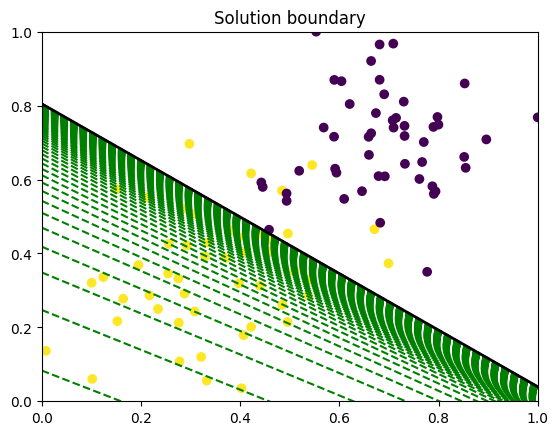

In [101]:
#plot 
w = np.random.randn(2)
while abs(w[1]) < 0.1:
    w = np.random.randn(2)
b = np.random.randn()

plt.scatter(data['x1'], data['x2'], c=data['label'])
plt.xlim(0, 1)
plt.ylim(0, 1)
xs = np.linspace(0,1,100)
ys = -(w[0] / w[1]) * xs - (b / w[1])
plt.plot(xs, ys, 'r-')

for _ in range(iteration):
    w, b = run_perceptron(w, x, y, learning_rate, b)
    total_error = 0
    for i in range(len(x)):
        y_hat = classification(w, x[i], b)
        total_error += abs(y[i] - y_hat)**2
    total_error /= len(x)
    errors.append(total_error)
    
    ys = -(w[0]/w[1])*xs - (b/w[1])
    plt.plot(xs, ys, 'g--')
#final black line
ys = -(w[0]/w[1])*xs - (b/w[1])
plt.plot(xs, ys, 'k-', linewidth=2)
plt.title("Solution boundary")
plt.show()

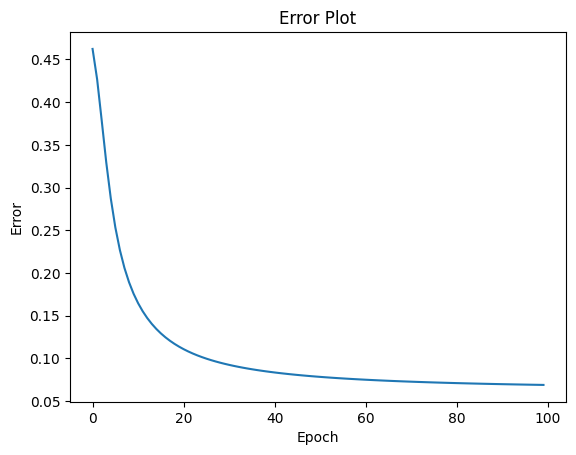

In [102]:
plt.figure()
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error Plot")
plt.show()